In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import glob
import cPickle as pickle

In [4]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [5]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [8]:
for c_base in ['10','100','1000']:
    for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Weber.base'+c_base):
    #     print subdir
        if len(subdir.split('/')) == 9:
          if len(os.listdir(subdir)) != 16:
            print subdir, len(os.listdir(subdir))

    #         classifier = subdir.split('/')[-1]
    #         dataset = subdir.split('/')[-2]
    #         experiment = subdir.split('/')[-3]

    #         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [15]:
all_stats = [None]*3

for a,c_base in enumerate(['10','100','1000']):

    experiment = 'C.Weber.base'+c_base
    e_dir = os.path.join(RESULTS_DIR, experiment)
    datasets = sorted(os.listdir(e_dir))

    stats = [None]*4

    classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers):

        stats[i] = []
        c_dir = os.path.join(e_dir, c)

#         stats_files = glob.glob(c_dir+'/*.p')
        stats_files = []
        for j in range(4):
            stats_files.append(c_dir+'/0'+str(j+1)+'.p')
        stats_per_c = []
#         print stats_files

        for s in stats_files:

            with open(s, 'r') as f:
                stats_from_file = pickle.load(f)

            stats_per_c.append(stats_from_file)
#             print stats_from_file['time']

        stats[i].append(stats_per_c)
#     print stats
    all_stats[a-1] = stats
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

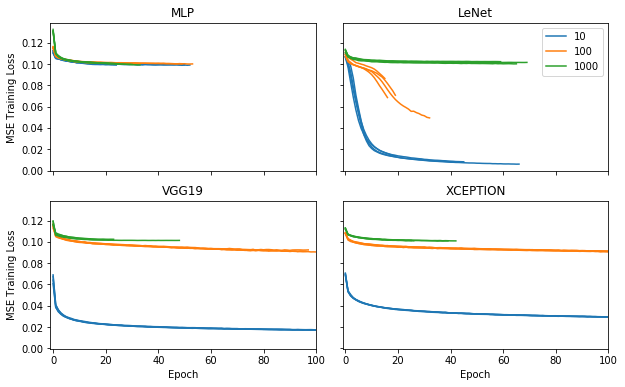

In [17]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Training Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for a,c_base in enumerate(['10','100','1000']):
        for sample in range(len(all_stats[0][0][0])):

            loss_for_type = all_stats[a-1][i][0][sample]['loss']

            if sample == 0:
                # only label the first
                plot(loss_for_type, label=''+c_base, color='C'+str(a))
            else:
                # but use the same colors for all
                plot(loss_for_type, color='C'+str(a))

            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/weber_training_loss_no_noise.pdf', bbox_inches='tight', pad_inches=0)

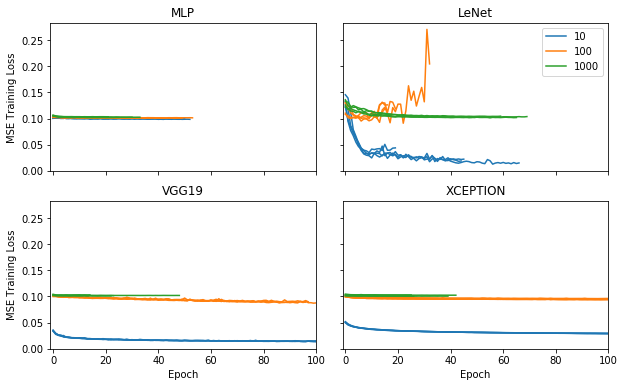

In [18]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Training Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for a,c_base in enumerate(['10','100','1000']):
        for sample in range(len(all_stats[0][0][0])):

            loss_for_type = all_stats[a-1][i][0][sample]['val_loss']

            if sample == 0:
                # only label the first
                plot(loss_for_type, label=''+c_base, color='C'+str(a))
            else:
                # but use the same colors for all
                plot(loss_for_type, color='C'+str(a))

            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/weber_validation_loss_no_noise.pdf', bbox_inches='tight', pad_inches=0)

In [23]:
len(all_stats)

3

/n/home05/haehn/.conda/envs/CP/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


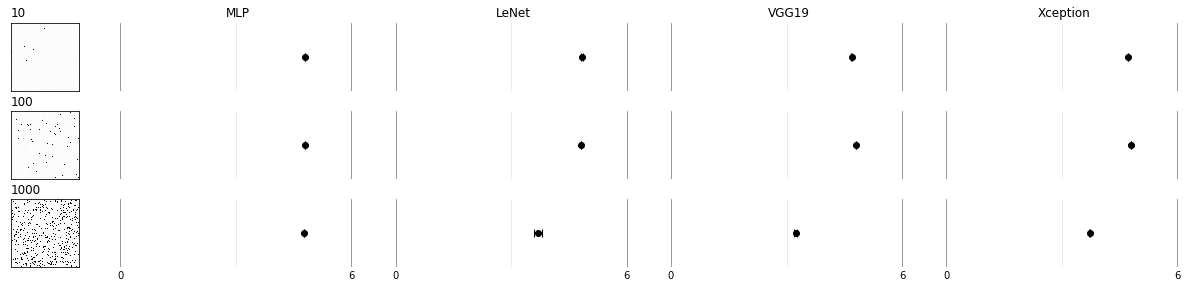

In [19]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

all_data = []
images = []

titles = ['10', '100', '1000']

## data
no_samples = len(all_stats[0][0][0])


bar_data = [None]*4
all_data = [None]*4
classifiers = ['MLP', 'LeNet', 'VGG19', 'Xception']
for i, c in enumerate(classifiers):

    mlae_for_c = []
    
    for a,c_base in enumerate(['10','100','1000']):
        
        mlae_for_type = []
        
        for sample in range(len(all_stats[0][0][0])):

            mlae_for_sample = all_stats[a][i][0][sample]['MLAE']

            mlae_for_type.append(mlae_for_sample)
    
        mlae_for_c.append(mlae_for_type)
        
    all_data[i] = mlae_for_c
    

## images
images = []
for a,c_base in enumerate(['10','100','1000']):
#     data, labels = C.Figure4.generate_datapoint()
    
    image, label = eval('C.Weber.base'+c_base)()
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))

    images.append(image)


fig = plt.figure(figsize=(21,4.5), facecolor='white')
gs = gridspec.GridSpec(3, 5, width_ratios=[.3,1,1,1,1], hspace=.3)

j = 0 # grid index (running)

rows = 3
for row in range(rows):
    
    for i, c in enumerate(['Image']+classifiers):
        
        fig = plt.subplot(gs[j])
        j += 1
        
        if i==0:
            # this is the image

            plt.title(titles[row].upper(), loc='left')

            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            ax.set_xticklabels('')
            ax.set_yticklabels('')
            
            plt.imshow(images[row], cmap='Greys', interpolation='none')
            
            continue

        #

        if row == 0:
            plt.title(c)

#         print row
        data = [all_data[i-1][row]]
#         print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
#         print sorted_data
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]
        
        means = [np.mean(r) for r in data]
        
        confidence = [1.96*np.std(r) for r in data]


        y_pos = range(len(means))


        plt.xlim(0,6.1)

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if row != 0:
        ax.get_yaxis().set_ticks([])
#         else:
#     #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)

        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
        # remove tick marks
        if row != 2:
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')

        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)

        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', color='black', capsize=4)
plt.savefig('../PAPER/gfx/weber_mlae_no_noise.pdf', bbox_inches='tight', pad_inches=0)

In [20]:
print [np.mean(all_data[v][0]) for v in range(4)]
print [np.mean(all_data[v][1]) for v in range(4)]
print [np.mean(all_data[v][2]) for v in range(4)]

[4.7976080367904776, 4.9597619927132888, 4.6909166752214508, 4.7124172770006068]
[4.7997208629281438, 4.8038114468676465, 4.8042504769852297, 4.8022643814855348]
[4.7807373836549747, 3.778945936478844, 3.2421606020152134, 3.7200648121776525]


In [33]:
for type_ in range(3):
    MLAE_mean = np.mean([np.mean(all_data[v][type_]) for v in range(4)])
    print 'Type', type_+1, 'MLAE', MLAE_mean, 'Abs. Error', np.exp2(MLAE_mean)-.125

Type 1 MLAE 4.76749310252 Abs. Error 27.1119471411
Type 2 MLAE 4.80163518243 Abs. Error 27.7642103655
Type 3 MLAE 3.96414956566 Abs. Error 15.4823053258


In [34]:
# now ranking just for VGG
for type_ in range(3):
    MLAE_mean = np.mean([np.mean(all_data[2][type_])])
    print 'Type', type_+1, 'MLAE', MLAE_mean, 'Abs. Error', np.exp2(MLAE_mean)-.125

Type 1 MLAE 4.70473231469 Abs. Error 25.9524756344
Type 2 MLAE 4.80516238558 Abs. Error 27.8324793052
Type 3 MLAE 3.29990027403 Abs. Error 9.72347450966


In [51]:
MLAEs = []

for s in range(1,5):
    with open(RESULTS_DIR+'C.Weber.base10/VGG19/0'+str(s)+'_noise.p', 'r') as f:
        gepickelt = pickle.load(f)
        
        print 'Sample', s
        print 'MLAE', np.log2(sklearn.metrics.mean_absolute_error(gepickelt['y_pred']*100, gepickelt['y_test']*100)+.125)
        print 'MLAE_stored', gepickelt['MLAE']
        print 'MAE', sklearn.metrics.mean_absolute_error(gepickelt['y_test'], gepickelt['y_pred'])
        print 'MSE', sklearn.metrics.mean_squared_error(gepickelt['y_test'], gepickelt['y_pred'])
        
        MLAEs.append(gepickelt['MLAE'])
        
print np.mean(MLAEs)

Sample 1
MLAE 3.27493630831
MLAE_stored 3.27493630831
MAE 0.0955453
MSE 0.0143393
Sample 2
MLAE 3.3285608483
MLAE_stored 3.3285608483
MAE 0.0992108
MSE 0.0150282
Sample 3
MLAE 3.31001804438
MLAE_stored 3.31001804438
MAE 0.0979279
MSE 0.014659
Sample 4
MLAE 3.28608589514
MLAE_stored 3.28608589514
MAE 0.0962962
MSE 0.0148746
3.29990027403


In [38]:
import sklearn.metricsics

0.095545255

In [42]:
gepickelt['y_test']

array([[ 0.33333334],
       [ 0.33333334],
       [ 1.        ],
       ..., 
       [ 0.8888889 ],
       [ 1.        ],
       [ 0.77777779]], dtype=float32)

In [43]:
gepickelt['y_pred']

array([[ 0.52556729],
       [ 0.34416121],
       [ 0.84728056],
       ..., 
       [ 0.74255157],
       [ 0.78335428],
       [ 0.64607447]], dtype=float32)

3.2749363083063914